# **Download libraries**

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import ResNet50 , VGG16


# **DATA PREPROCESSING:**
1.   Download CIFAR 10 datasets
2.   Normalize the pixel values and convert the labels to one-hot encode
3.   Data augamntation
4.   Data visualization

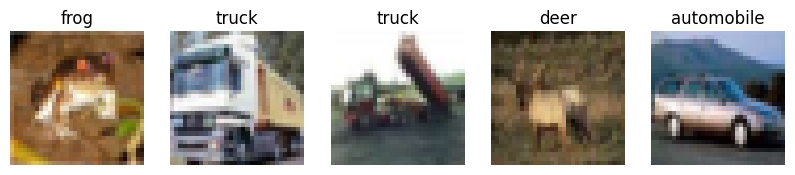

In [19]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
datagen.fit(x_train)

# Visualization of some images and labels
def plot_images(images, labels, class_names):
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    for i in range(5):
        axes[i].imshow(images[i])
        axes[i].set_title(class_names[labels[i]])
        axes[i].axis('off')
    plt.show()
class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_images(x_train[:5], np.argmax(y_train[:5], axis=1), class_names)


# **Model Architecture**

1.   Convolutional layers
2.   Prepare the model for training





In [20]:
model_1 = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model_1.summary()


# Compile model_1
model_1.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,252,042 (12.41 MB)

 Trainable params: 3,250,122 (12.40 MB)

 Non-trainable params: 1,920 (7.50 KB)

# **Model Training**

In [22]:

# Train model_1 with earlly stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_1= model_1.fit(datagen.flow(x_train, y_train, batch_size=128),
                        validation_data=(x_test, y_test), epochs=100,
                        callbacks=[early_stopping])




Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.2949 - loss: 2.1623 - val_accuracy: 0.2368 - val_loss: 2.3022
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.4881 - loss: 1.4629 - val_accuracy: 0.5787 - val_loss: 1.2059
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.5717 - loss: 1.2059 - val_accuracy: 0.6716 - val_loss: 0.9476
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.6418 - loss: 1.0143 - val_accuracy: 0.6458 - val_loss: 1.1434
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.6762 - loss: 0.9275 - val_accuracy: 0.6337 - val_loss: 1.3042
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.7041 - loss: 0.8422 - val_accuracy: 0.6785 - val_loss: 1.0109
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.7298 - loss: 0.7867 - val_accuracy: 0.7336 - val_loss: 0.8186
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.7437 - loss: 0.7545 - val_

# **Model Evaluation**

evaluate the model by
*   Confusion matrix
*   Accuracy



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8689 - loss: 0.4020
Test Accuracy: 86.6800%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


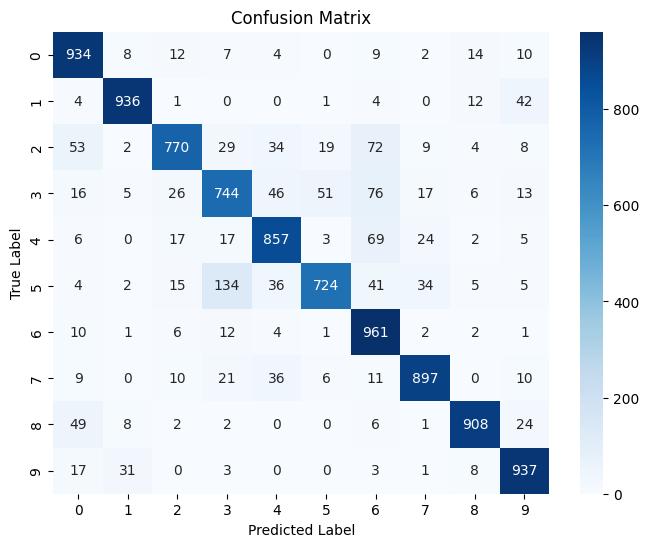

In [23]:
# Evaluate the model by accuracy
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.4f}%')

# Confusion Matrix
y_pred = model_1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(10),
            yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

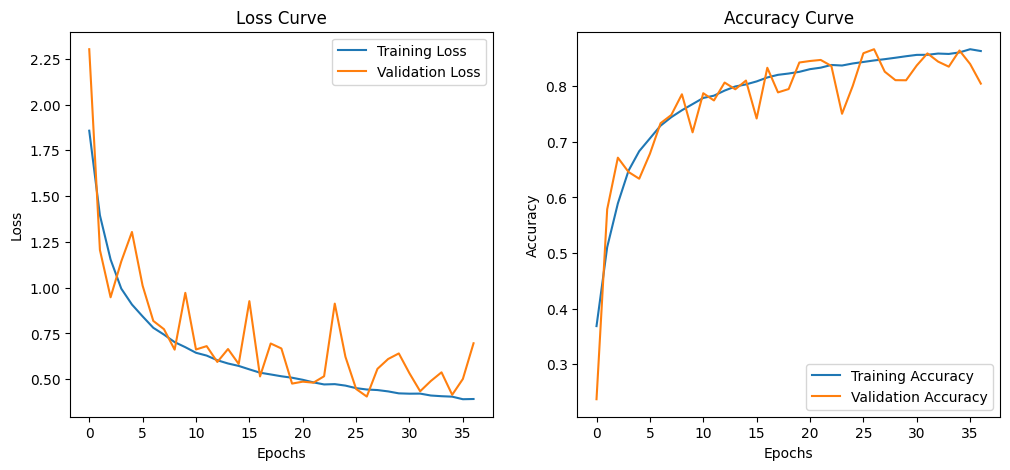

In [29]:
# Plot training and validation accuracy and loss for model 1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [30]:
model_1.save('cnn1_model.h5')

# **Second model of CNN**


In [34]:
# Clear any previous session
tf.keras.backend.clear_session()
# Define a deeper model
model_2 = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Model 2 Training

1.   Prepare the model
2.   Train the model



In [35]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model_2.compile(optimizer=optimizer, loss='categorical_crossentropy',
                metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10,
                               restore_best_weights=True)

# Train the model
history = model_2.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=200,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr, early_stopping])


Epoch 1/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 47ms/step - accuracy: 0.2821 - loss: 2.5588 - val_accuracy: 0.3769 - val_loss: 2.2898 - learning_rate: 0.0010
Epoch 2/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.4980 - loss: 1.7089 - val_accuracy: 0.6303 - val_loss: 1.3505 - learning_rate: 0.0010
Epoch 3/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.5984 - loss: 1.4428 - val_accuracy: 0.5510 - val_loss: 1.7027 - learning_rate: 0.0010
Epoch 4/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6513 - loss: 1.3139 - val_accuracy: 0.5346 - val_loss: 1.9527 - learning_rate: 0.0010
Epoch 5/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6797 - loss: 1.2440 - val_accuracy: 0.7268 - val_loss: 1.1580 - learning_rate: 0.0010
Epoch 6/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.7041 - loss: 1.2111 - val_accuracy: 0.7437 - val_loss: 1.1108 - learning_rate: 0.0010
Epoch 7/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7

# **Model 2 Evaluation**

evaluate the model by
*   Confusion matrix
*   Accuracy


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9176 - loss: 0.4706
Test Accuracy: 91.58%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


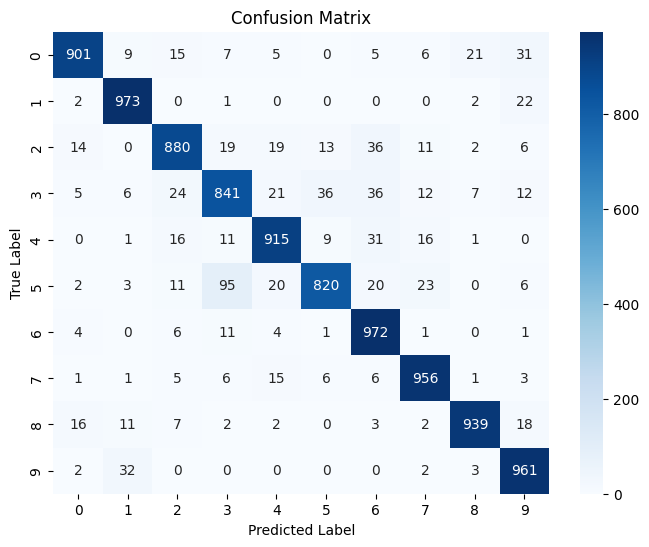

In [36]:
# Evaluate model 2
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion Matrix
y_pred = model_2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(10),
            yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

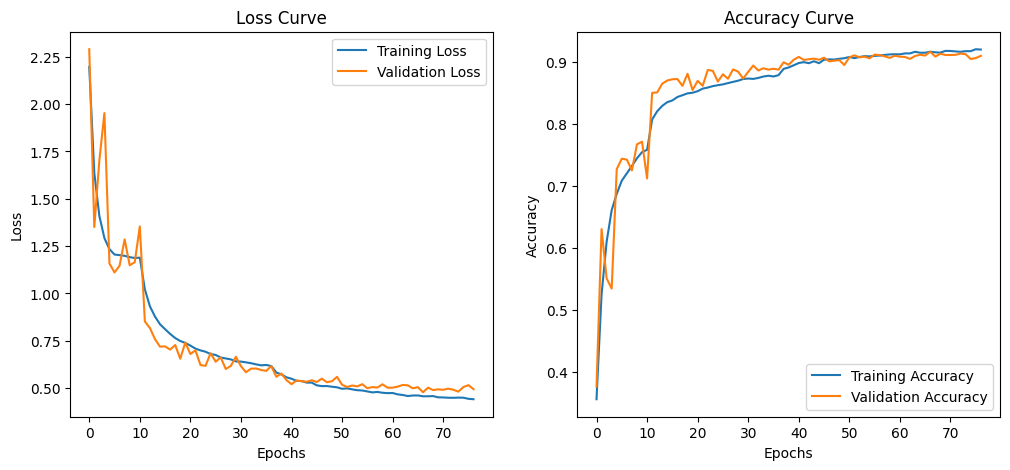

In [37]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [38]:
model_2.save('cnn2_model.h5')

In [39]:
import pickle
with open("gro5.pkl", "wb") as f:
    pickle.dump(history.history, f)